# Exersices

# 1. Import blobs dataset from scikit-learn
## apply the k-means algorithm.

In [1]:
import math
import string
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

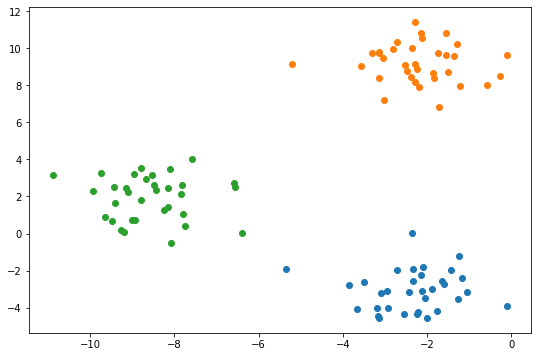

In [2]:
df = pd.DataFrame(datasets.make_blobs()[0], columns=["x","y"])

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters).fit(df)
df["group"] = kmeans.predict(df)

plt.figure(figsize=(9,6))
for idx, group in enumerate({
    group: df[df.group == group] 
    for group in range(n_clusters)
}):
    data = df[df.group == idx]
    plt.scatter(data.x, data.y)
    
plt.show()

# 2. Import make_moons dataset from scikit-learn 
## apply the DBSCAN algorithm.

Consider a set of points in some space to be clustered. Let ε be a parameter specifying the radius of a neighborhood with respect to some point. For the purpose of DBSCAN clustering, the points are classified as core points, (density-)reachable points and outliers, as follows:

- A point p is a core point if at least minPts points are within distance ε of it (including p).
- A point q is directly reachable from p if point q is within distance ε from core point p. Points are only said to be directly reachable from core points.
- A point q is reachable from p if there is a path p1, ..., pn with p1 = p and pn = q, where each pi+1 is directly reachable from pi. Note that this implies that the initial point and all points on the path must be core points, with the possible exception of q.
- All points not reachable from any other point are outliers or noise points.

Now if p is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point; non-core points can be part of a cluster, but they form its "edge", since they cannot be used to reach more points. 

### Applying same technique as before we *incorrectly* cluster the two curves

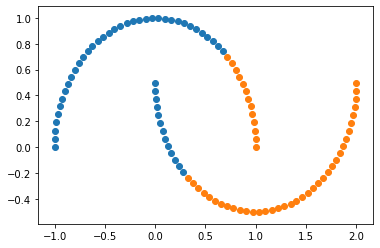

In [3]:
df = pd.DataFrame(datasets.make_moons()[0], columns=["x","y"])

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters).fit(df)
df["label"] = kmeans.predict(df)

for idx, group in enumerate({
    group: df[df.label == group] 
    for group in range(n_clusters)
}):
    data = df[df.label == idx]
    plt.scatter(data.x, data.y)
    
plt.show()

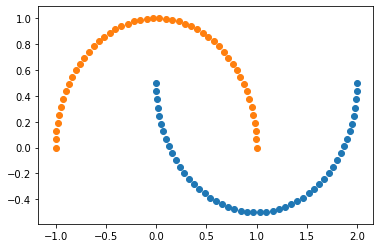

In [4]:
df = pd.DataFrame(datasets.make_moons()[0], columns=["x","y"])

model = DBSCAN(eps=.1, min_samples=1).fit(df)
df["label"] = model.fit_predict(df)

for idx, group in enumerate({
    group: df[df.label == group] 
    for group in range(n_clusters)
}):
    data = df[df.label == idx]
    plt.scatter(data.x, data.y)
    
plt.show()

## Custom cluster with low min_distance between points

### Loop through each **point** in "list"
- Cluster around **point**  
  & Remove all neighbors from **"list"**
- Remove small clusters: n_neighbors
  
### list ends up auto sorting in n-clusters, based on distance

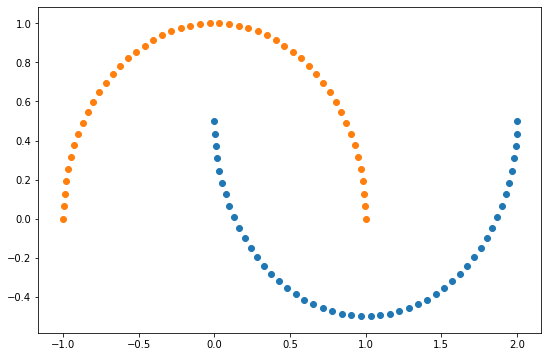

In [5]:
# DataFrame with points on 2 curves generated with make_moons
df = pd.DataFrame(datasets.make_moons()[0], columns=["x","y"])
#df = pd.DataFrame(datasets.make_blobs()[0], columns=["x","y"])
data_range = range(len(df))

# NxN matrix cross calculating distance between points
# Reshape it back to 2D array "cross distance matrix"
distance_matrix = np.array([
    math.sqrt(
        math.pow(df.iloc[idx].x - df.iloc[i].x, 2)
       +math.pow(df.iloc[idx].y - df.iloc[i].y, 2)
    )for idx in data_range for i in data_range]
).reshape((len(df), len(df)))

# Minimum distance for points to be grouped together
min_distance = 0.1 # hardcoded min value
min_distance = pd.DataFrame(distance_matrix).quantile(0.1).median()

# Neighbors for each point where distance less than min
neighbors = {
    idx: [i for i, dst in enumerate(distance_matrix[idx]) 
          if dst != 0 and dst < min_distance
    ]for idx in data_range
}

def get_neighbors(idx, clust):
# Recursively go through connected neighbors
# Only add values not already classified
    for n in neighbors[idx]:
        if n not in classified:
            clusters[clust].append(n)
            classified.append(n)
            get_neighbors(n, clust)
            
clusters = {}
classified = []
# Loop through all values, keep track of which cluster
# Add all neighbors to current cluster
for clust, idx in enumerate(data_range):
    if idx in classified:
        continue        
    clusters[clust] = []
    get_neighbors(idx, clust)
    
def get_cluster_key(idx):
# Returns the cluster to which the point belongs 
    for k,v in clusters.items():
        if idx in v: return k
        
# New columns for cluster data
clusters = {string.ascii_uppercase[idx]: clusters[key] 
    for idx, key in enumerate(clusters)}
df["cluster"] = list(map(get_cluster_key, data_range))

# Plot the data for each cluster
plt.figure(figsize=(9,6))
for idx, cluster in {
    clust: df[df.cluster == clust] 
    for clust in clusters
}.items():
    data = df[df.cluster == idx]
    plt.scatter(data.x, data.y)
plt.show()

# 3. Import load_digits dataset from scikit-learn  
## apply the k-means algorithm.

In [6]:
digits = datasets.load_digits()
clst = KMeans(n_clusters=10).fit(digits.data)
digits_2d = PCA(n_components=2).fit_transform(digits.data)
digits_3d = PCA(n_components=3).fit_transform(digits.data)
df = DataFrame(digits.data)
df["cluster"] = clst.predict(digits.data)
df["label"] = digits.target
df["x"] = digits_3d[:,0]
df["y"] = digits_3d[:,1]
df["z"] = digits_3d[:,2]
print("Accuracy:", round(metrics.accuracy_score(df.label, df.cluster), 2), "%")

Accuracy: 0.24 %


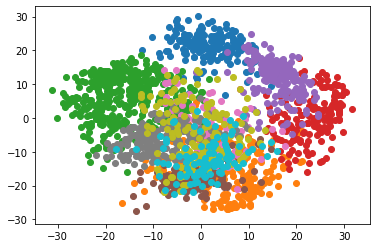

In [7]:
for lab in df["cluster"].unique():
    data = df[df["cluster"] == lab]
    plt.scatter(data.x, data.y)
plt.show()

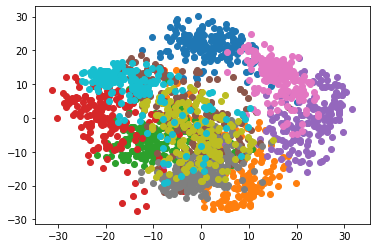

In [8]:
for lab in df["label"].unique():
    data = df[df["label"] == lab]
    plt.scatter(data.x, data.y)
plt.show()

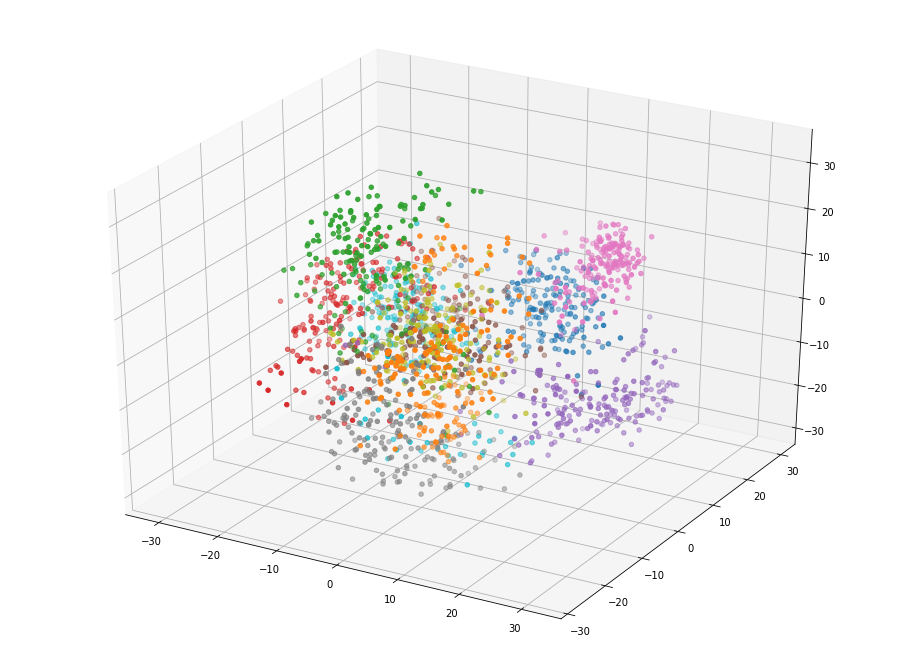

In [9]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
for lab in df["label"].unique():
    data = df[df["label"] == lab]
    ax.scatter(data.x, data.y, data.z)

# 4. Using the same iris data set apply k-means clustering with 3 clusters. 
# Create a function plant_clustering that loads the iris data set, clusters the data and returns the accuracy_score.

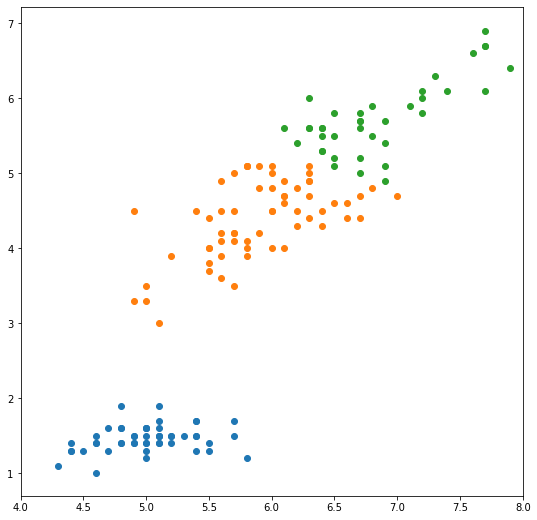

Accuracy: 0.89 %


In [10]:
def plant_clustering(n_clusters):
    # Load iris data into dataframe
    data = datasets.load_iris()
    df = DataFrame(data.data)
    
    # Fit KMeans model with dataframe
    kmeans = KMeans(
        n_clusters=n_clusters
    ).fit(df)
    
    # Add columns for cluster and label
    df["cluster"] = kmeans.predict(df)
    df["label"] = data.target
    
    # Plot points in each cluster
    plt.figure(figsize=(9,9))
    plt.xlim(4,8)
    for idx, clust in enumerate({
        clust: df[df.cluster == clust] 
        for clust in range(n_clusters)
    }): # Select points in cluster
        data = df[df.cluster == idx]
        plt.scatter(data[0], data[2])
    plt.show()
    
    # return dataframe and accuracy
    return df, metrics.accuracy_score(
        df["label"], df["cluster"])

df, accuracy = plant_clustering(3)
print("Accuracy:", round(accuracy,2), "%")

## Labeled clusteres

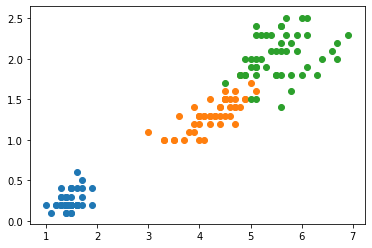

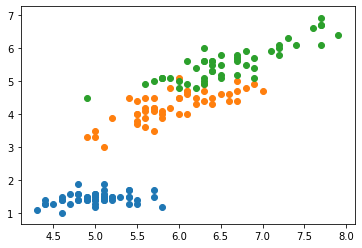

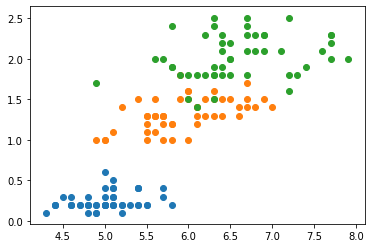

In [11]:
for combo in [(2,3),(0,2),(0,3)]:
    [plt.scatter(
        df[df.label == cluster][combo[0]],
        df[df.label == cluster][combo[1]])
     for cluster in df.label.unique()]
    plt.show()

### Above KMeans actually has an accuracy in the 80% but data not labeled correctly

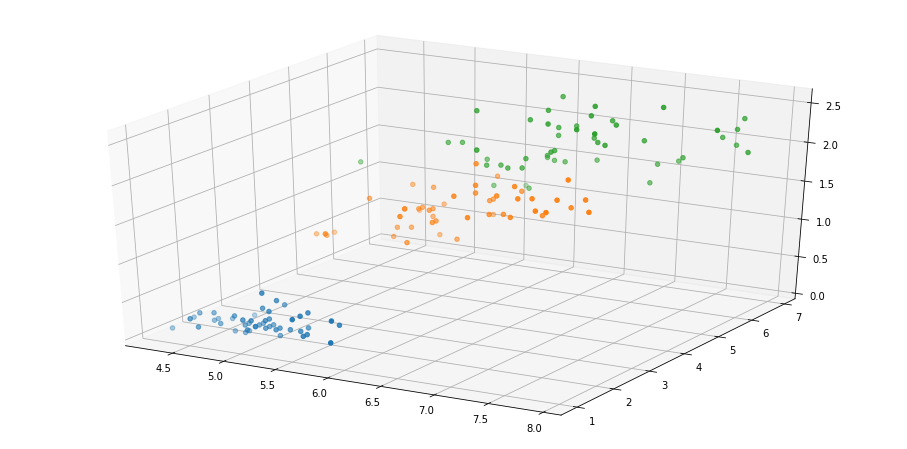

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

for cluster in df.label.unique():
    d = df[df.label == cluster]
    ax.scatter(d[0], d[2], d[3])

In [34]:
class Cluster:
    def __init__(self, data:np.array, columns=["x","y","z"],
                 min_distance:float=0.3, core_size:int=5):
        self.data = data
        self.df = DataFrame(data, columns=columns)
        self._min_distance = min_distance
        self._core_size = core_size
        self.range = range(len(self.data))
        self.distance_matrix = self.calculate_distance_matrix()
        
    @property
    def min_distance(self):
        return self._min_distance
    @min_distance.setter
    def min_distance(self, val:float):
        self._min_distance = val
    @property
    def core_size(self):
        return self._core_size
    @core_size.setter
    def core_size(self, val):
        self._core_size = val
        
    def calculate_distance_matrix(self) -> np.array:
        return np.array([
            math.pow(
                math.pow(self.data[idx][0] - self.data[i][0], 2)
               +math.pow(self.data[idx][1] - self.data[i][1], 2)
               +math.pow(self.data[idx][2] - self.data[i][2], 2),
                1/2
            )for idx in self.range for i in self.range
        ]).reshape(len(self.range),len(self.range))
    
    def get_neighbors(self):
        return {
            idx: [i for i, dst in enumerate(self.distance_matrix[idx])
                  if dst != 0 and dst < self.min_distance]
            for idx in self.range
        }
    def core_points(self):
        return {
            key: len(lst) 
            for key, lst in self.get_neighbors().items()
            if len(lst) > self._core_size
        }
    def connected(self):
        neighbors = self.get_neighbors()
        def walk_neighbors(idx, key):
            for neighbor in neighbors[idx]:
                if neighbor not in classified:
                    result[key].append(neighbor)
                    classified.append(neighbor)
                    walk_neighbors(neighbor, key)
                    
        result = {}
        classified = []     
        for idx, key in enumerate(self.core_points()):
            if key in classified: 
                continue        
            result[idx] = []
            walk_neighbors(key, idx)
            
        def ascii_gen():
            for char in string.ascii_uppercase:
                yield char
                
        ascii_gen = ascii_gen()
        return {
            next(ascii_gen): result[key]
            for key in result if result[key] != []
        }
    
    def plot(self, axis=["x","y","z"]):        
        def get_cluster_key(idx): 
            for k,v in clusters.items():
                if idx in v: return k     
                
        clusters = self.connected()                
        self.df["label"] = list(map(
            get_cluster_key, self.range)) 
        
        if len(axis)==3:
            fig = plt.figure(figsize=(13,8))
            ax = fig.add_subplot(1,1,1, projection='3d')
            [plt.scatter(*(
                self.df[self.df.label == cluster][axi]
                for axi in axis))
            for cluster in self.df.label.unique()
            ]; plt.show()
            
        else:
            [plt.scatter(*(
                self.df[self.df.label == cluster][ax]
                for ax in axis))
            for cluster in self.df.label.unique()
            ]; plt.show()

clst = Cluster(
    datasets.load_iris().data[:,[2,3,0]],
    columns=["x","y","z"])

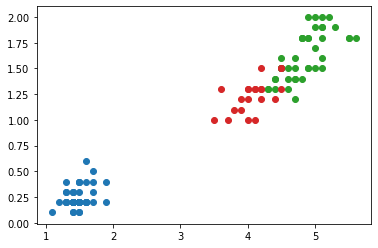

In [35]:
clst.min_distance = 0.3 # default
clst.core_size = 4
clst.plot(["x","y"])

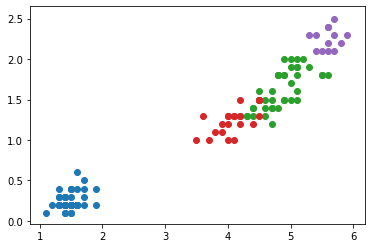

In [36]:
clst.min_distance = 0.3
clst.core_size = 3
clst.plot(["x","y"])

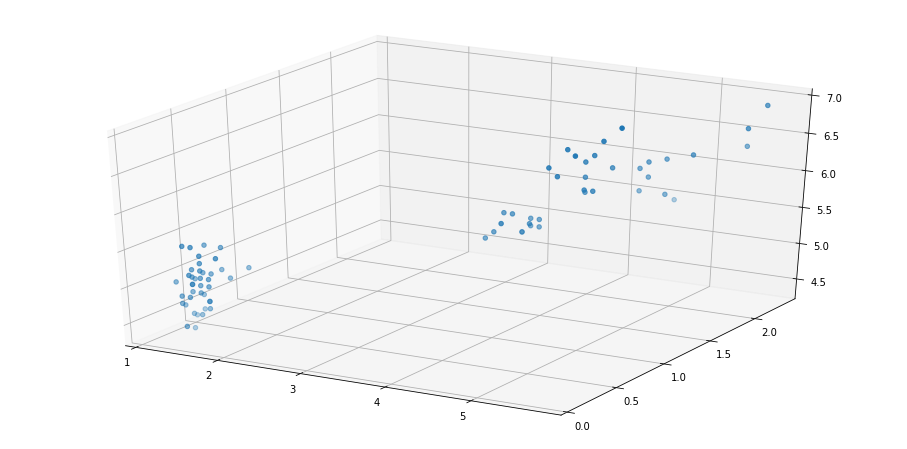

In [39]:
clst.min_distance = .3
clst.core_size = 3


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()